In [1]:
!nvidia-smi

Mon Aug 21 08:20:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                     Off | 00000000:4B:00.0 Off |                    0 |
|  0%   32C    P8              12W / 300W |      7MiB / 46068MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 11.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.2 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16) 

/home/tsd/mid/benv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
text_encoder/pytorch_model.fp16.safetensors not found

Fetching 28 files:   4%|▎         | 1/28 [00:01<00:46,  1.71s/it]




















































































































































































































































































































































































































































































































































































































































In [4]:
!nvcc --version
!whereis nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0
nvcc: /usr/bin/nvcc


In [5]:
pipe = pipe.to("cuda")  

100%|██████████| 50/50 [00:03<00:00, 15.89it/s]


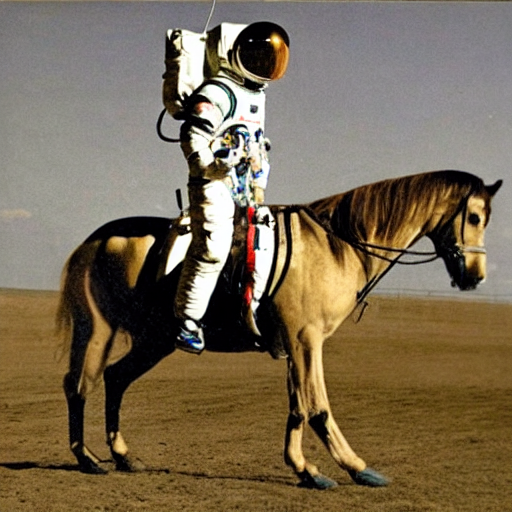

In [10]:
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with 
image



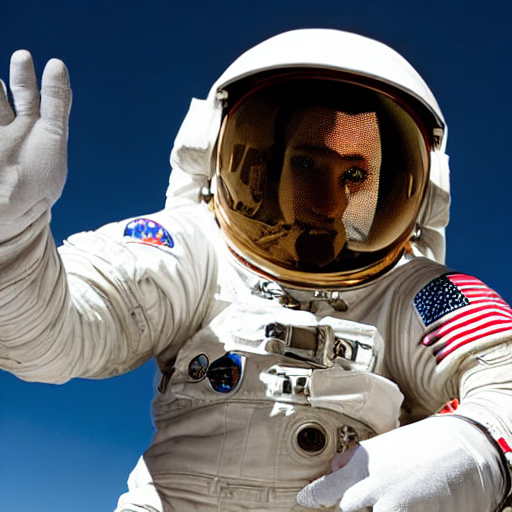

In [7]:
# import base64

# with open("astronaut_rides_horse.png", "rb") as img_file:
#   b64_string = base64.b64encode(img_file.read())

# image_url = "data:image/png;base64," + b64_string.decode('utf-8')

# print(image_url)

# not quite work, too large to be encoded

In [11]:
import requests 

# Upload image to Imgur and get image url, using the tsd_innolab google account
image_file = 'astronaut_rides_horse.png'
imgur_client_id = '89aeeab4d0a61f7' 

imgur_url = 'https://api.imgur.com/3/image'
headers = {'authorization': 'Client-ID ' + imgur_client_id}
files = {'image': open(image_file, 'rb')}

response = requests.post(imgur_url, headers=headers, files=files)
img_url = response.json()['data']['link']

In [9]:
img_url

'https://i.imgur.com/XjMPrvv.png'

In [12]:
img_url

'https://i.imgur.com/3fcfnm4.png'